# <span style="color:purple"> Logistic Regression [Mutli Class]


<span style="color:blue; font-weight:bold">**The sklearn module has predefined datasets which we can use. I am gonna use load_digits module which has 1797 images.**</span>

<span style="color:blue; font-weight:bold">**Each image(grayscale image) has a size of 8*8 pixels and is represented by a 1-D array.**</span>

<span style="color:blue; font-weight:bold">**For machine learning tasks, these 8x8 images are flattened into a 1D array of 64 features (8 * 8 = 64).**</span>

In [2]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline

digits = load_digits()

<Figure size 640x480 with 0 Axes>

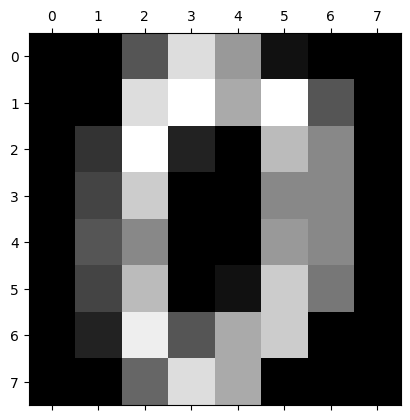

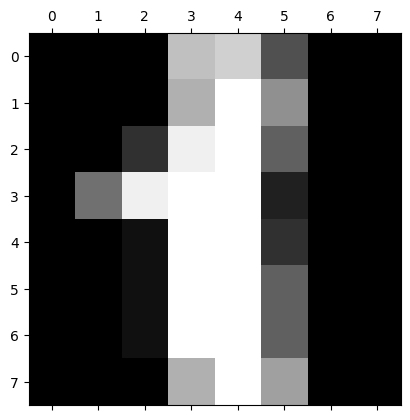

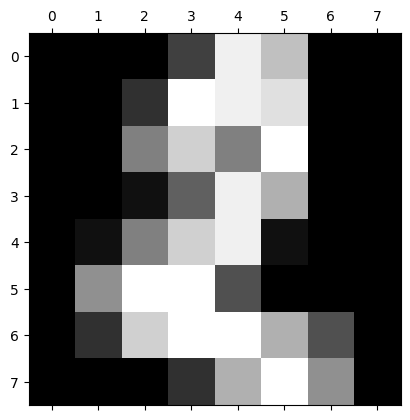

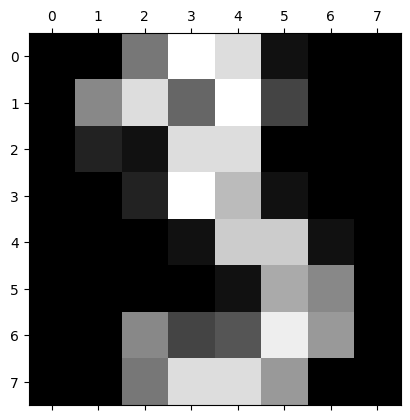

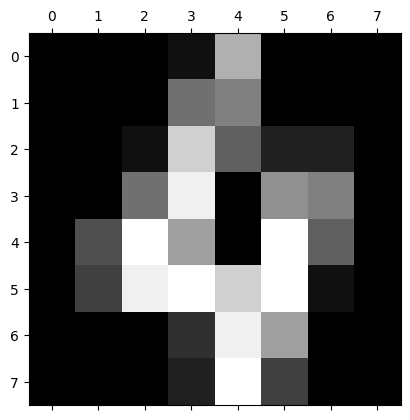

In [3]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

# <span style="color:purple;">Create and train Logistic Regression Model

In [6]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [8]:
model.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [9]:
model.score(X_test, y_test)

0.9611111111111111

In [10]:
model.predict(digits.data[0:5])   # Predicting first 5 digits on the dataset of our trained model. It should give first 5 digits as output.

array([0, 1, 2, 3, 4])

# <span style="color:purple;"> Plotting Confusion Matrix

**It's a great tool for evaluating the behavior and understanding the effectiveness of a binary or categorical classifier.**

**If you are not familiar with the confusion matrix concept i am leaving the explanation and code snippet inside the <ins style="color:blue;"> <u style="color:brown">[confusion matrix](side_concepts/confustion_matrix.ipynb)</u></ins>  file.**



In [11]:
y_predicted = model.predict(X_test) # Storing predicted values in y_predicted

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[30,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  1,  0,  0,  0,  1,  0],
       [ 0,  1, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 51,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 35,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 24,  0,  1,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 31,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 29,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 39]])

Text(95.72222222222221, 0.5, 'Truth')

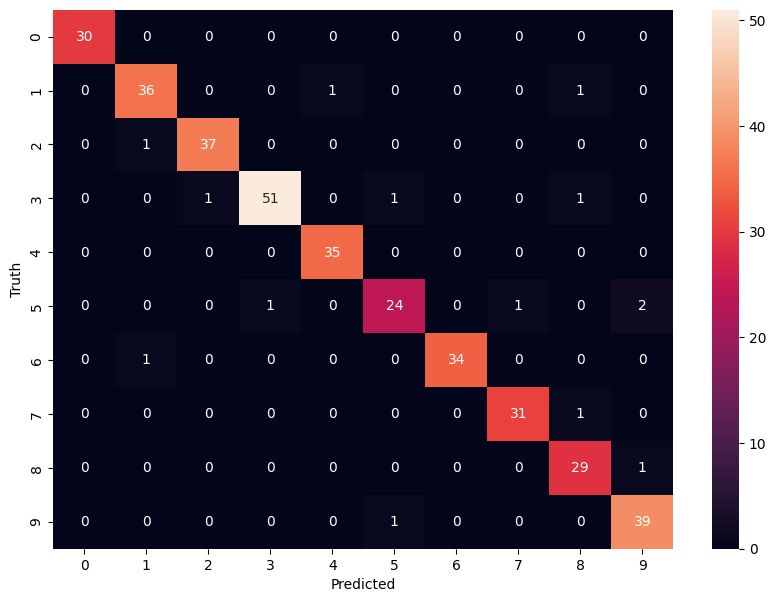

In [13]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')